1. Determine the five most common journals and the total articles for each. 
2. Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal. 
3. For a real bonus round, identify the open access prices paid by subject area.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats.mstats import winsorize
%matplotlib inline

pd.options.display.max_rows=10

In [2]:
with open('spend_data.csv') as f:
    print(f)

<_io.TextIOWrapper name='spend_data.csv' mode='r' encoding='cp1252'>


In [82]:
df = pd.read_csv('spend_data.csv', encoding='latin1')
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in subjects at ultra-high risk for psychosis,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-negative bacterial surface using lipopolysaccharides from rough strains of escherichia coli,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related opioids with irreversible ? opioid receptor antagonist effects.",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor agonist activity.,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoesters: mechanism and synthetic utility.,£685.88


In [83]:
df.columns = ['PMID/PMCID', 'Publisher', 'Journal', 'Article', 'Cost']
df.head()

,PMID/PMCID,Publisher,Journal,Article,Cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in subjects at ultra-high risk for psychosis,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-negative bacterial surface using lipopolysaccharides from rough strains of escherichia coli,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related opioids with irreversible ? opioid receptor antagonist effects.",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor agonist activity.,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoesters: mechanism and synthetic utility.,£685.88


In [84]:
#eliminating formatting differences between journal names
df.Journal = df.Journal.str.lower().str.strip()

#identify typos common to many journal names
df.Journal = df.Journal.str.replace('1','one').str.replace('plosone','plos one').str.replace('journal ','').str.replace('of ','').str.replace('the ','').str.replace('jnl','').str.replace('j ','').str.replace('biol ','biological ').str.replace('pnas', 'proceedings national academy sciences')

#eliminating formatting differences between journal names
df.Journal = df.Journal.str.strip()
df.head()

,PMID/PMCID,Publisher,Journal,Article,Cost
0,NaN,CUP,psychological medicine,Reduced parahippocampal cortical thickness in subjects at ultra-high risk for psychosis,£0.00
1,PMC3679557,ACS,biomacromolecules,Structural characterization of a Model Gram-negative bacterial surface using lipopolysaccharides from rough strains of escherichia coli,£2381.04
2,23043264 PMC3506128,ACS,med chem,"Fumaroylamino-4,5-epoxymorphinans and related opioids with irreversible ? opioid receptor antagonist effects.",£642.56
3,23438330 PMC3646402,ACS,med chem,Orvinols with mixed kappa/mu opioid receptor agonist activity.,£669.64
4,23438216 PMC3601604,ACS,org chem,Regioselective opening of myo-inositol orthoesters: mechanism and synthetic utility.,£685.88


In [86]:
#formatting to view entire journal name
pd.set_option('display.max_colwidth', -1)

#counting number of articles by journal, descending
df.groupby(['Journal']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

,Journal,counts
708,plos one,206
132,biological chemistry,66
626,neuroimage,29
720,proceedings national academy sciences,28
655,nucleic acids research,26
...,...,...
350,ethn health,1
352,eur immunol,1
353,european cell biology,1
354,european child and adolescent psychiatry,1


#### Q: Determine the five most common journals and the total articles for each. 
<br />
Plos One: 206 <br />
Biological Chemistry: 66<br /> 
Neuroimage: 29<br /> 
Proceedings of the National Academy of Sciences: 28 <br />
Nucleic Acids Research: 26

In [87]:
df

,PMID/PMCID,Publisher,Journal,Article,Cost
0,NaN,CUP,psychological medicine,Reduced parahippocampal cortical thickness in subjects at ultra-high risk for psychosis,£0.00
1,PMC3679557,ACS,biomacromolecules,Structural characterization of a Model Gram-negative bacterial surface using lipopolysaccharides from rough strains of escherichia coli,£2381.04
2,23043264 PMC3506128,ACS,med chem,"Fumaroylamino-4,5-epoxymorphinans and related opioids with irreversible ? opioid receptor antagonist effects.",£642.56
3,23438330 PMC3646402,ACS,med chem,Orvinols with mixed kappa/mu opioid receptor agonist activity.,£669.64
4,23438216 PMC3601604,ACS,org chem,Regioselective opening of myo-inositol orthoesters: mechanism and synthetic utility.,£685.88
...,...,...,...,...,...
2122,2901593,Wolters Kluwer Health,circulation research,Mechanistic Links Between Na+ Channel (SCN5A) Mutations and Impaired Cardiac Pacemaking in Sick Sinus Syndrome,£1334.15
2123,3748854,Wolters Kluwer Health,aids,Evaluation of an empiric risk screening score to identify acute and early HIV-1 infection among MSM in Coastal Kenya.,£1834.77
2124,3785148,Wolters Kluwer Health,pediatr infect dis j,Topical umbilical cord care for prevention of infection and neonatal mortality.,£1834.77
2125,PMCID:\n PMC3647051\n,Wolters Kluwer N.V./Lippinott,aids,Grassroots Community Organisations' Contribution to the Scale-Up of HIV Testing and Counselling Services in Zimbabwe,£2374.52


In [88]:
#Removing currency symbols in order to convert cost to integers
df.Cost = df.Cost.replace('[\$,]','', regex=True)
df.Cost = df.Cost.replace('[\£,]','', regex=True)
df.Cost = pd.to_numeric(df.Cost)
df

,PMID/PMCID,Publisher,Journal,Article,Cost
0,NaN,CUP,psychological medicine,Reduced parahippocampal cortical thickness in subjects at ultra-high risk for psychosis,0.00
1,PMC3679557,ACS,biomacromolecules,Structural characterization of a Model Gram-negative bacterial surface using lipopolysaccharides from rough strains of escherichia coli,2381.04
2,23043264 PMC3506128,ACS,med chem,"Fumaroylamino-4,5-epoxymorphinans and related opioids with irreversible ? opioid receptor antagonist effects.",642.56
3,23438330 PMC3646402,ACS,med chem,Orvinols with mixed kappa/mu opioid receptor agonist activity.,669.64
4,23438216 PMC3601604,ACS,org chem,Regioselective opening of myo-inositol orthoesters: mechanism and synthetic utility.,685.88
...,...,...,...,...,...
2122,2901593,Wolters Kluwer Health,circulation research,Mechanistic Links Between Na+ Channel (SCN5A) Mutations and Impaired Cardiac Pacemaking in Sick Sinus Syndrome,1334.15
2123,3748854,Wolters Kluwer Health,aids,Evaluation of an empiric risk screening score to identify acute and early HIV-1 infection among MSM in Coastal Kenya.,1834.77
2124,3785148,Wolters Kluwer Health,pediatr infect dis j,Topical umbilical cord care for prevention of infection and neonatal mortality.,1834.77
2125,PMCID:\n PMC3647051\n,Wolters Kluwer N.V./Lippinott,aids,Grassroots Community Organisations' Contribution to the Scale-Up of HIV Testing and Counselling Services in Zimbabwe,2374.52


In [89]:
#confirming that cost values are numeric
df.dtypes

PMID/PMCID    object 
Publisher     object 
Journal       object 
Article       object 
Cost          float64
dtype: object

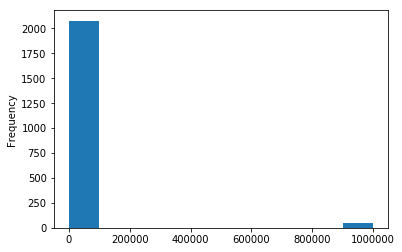

In [90]:
#initial plot to identify where outliers are
df.Cost.plot.hist()
plt.show()

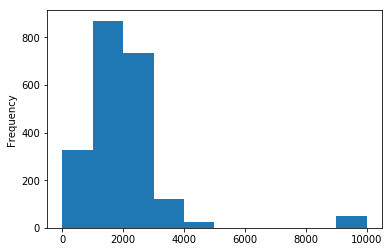

In [66]:
#second plot to narrow outlier range >>>  clearly anything above 6,000 is an outlier 
t = df.Cost.clip(0,10000)
t.plot.hist()

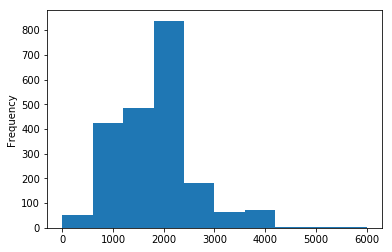

In [70]:
#replacing outliers with median values
median = df.loc[df['Cost']<6000,'Cost'].median()
df['Cost'] = np.where(df['Cost']>6000, median,df['Cost'])
df['Cost'].plot.hist()

In [76]:
#printing results

print(df.groupby('Journal')['Cost'].median())

Journal
abnormal child psychology and psychiatry                                                                                  2247.340
abnormal psychology                                                                                                       2534.530
academy nutrition and dietetics                                                                                           2379.540
acquired immune deficiency syndromes                                                                                      2034.750
acquired immune deficiency syndroms (jaids)                                                                               1836.920
acs chemical biology                                                                                                      1294.590
acs chemical neuroscience                                                                                                 1186.800
acs nano                                                                   

In [78]:
print(df.groupby('Journal')['Cost'].mean())

Journal
abnormal child psychology and psychiatry                                                                                  2247.340000
abnormal psychology                                                                                                       2534.530000
academy nutrition and dietetics                                                                                           2379.540000
acquired immune deficiency syndromes                                                                                      2034.750000
acquired immune deficiency syndroms (jaids)                                                                               1836.920000
acs chemical biology                                                                                                      1418.186000
acs chemical neuroscience                                                                                                 1186.800000
acs nano                                              

In [77]:
print(df.groupby('Journal')['Cost'].std())

Journal
abnormal child psychology and psychiatry                                                                                 NaN         
abnormal psychology                                                                                                      NaN         
academy nutrition and dietetics                                                                                          NaN         
acquired immune deficiency syndromes                                                                                     NaN         
acquired immune deficiency syndroms (jaids)                                                                              NaN         
acs chemical biology                                                                                                      507.309560 
acs chemical neuroscience                                                                                                NaN         
acs nano                                              

In [ ]:
# df.Cost.plot.hist(bins=20)
# df.groupby('Journal')['Cost'].median()
# df.groupby('Journal')['Cost'].mean()
# print("{:,.0f}".format(df.Cost.median()))